In [86]:
#Gold Price Prediction Using Random Forest

In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [92]:
#Load data into Dataframe
gold_data=pd.read_csv("data\Gold_Price.csv")


<>:2: SyntaxWarning: invalid escape sequence '\G'
<>:2: SyntaxWarning: invalid escape sequence '\G'
C:\Users\ashis\AppData\Local\Temp\ipykernel_39044\3441817433.py:2: SyntaxWarning: invalid escape sequence '\G'
  gold_data=pd.read_csv("data\Gold_Price.csv")


In [94]:
 #to print First 5 rows
gold_data.head()


Date          SPX        GLD        USO     SLV   EUR/USD
0  1/2/2008  1447.160034  84.860001  78.470001  15.180  1.471692
1  1/3/2008  1447.160034  85.570000  78.370003  15.285  1.474491
2  1/4/2008  1411.630005  85.129997  77.309998  15.167  1.475492
3  1/7/2008  1416.180054  84.769997  75.500000  15.053  1.468299
4  1/8/2008  1390.189941  86.779999  76.059998  15.590  1.557099

In [96]:
 #To check information
gold_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [98]:
#to Check rows and columns
gold_data.shape


(2290, 6)

In [100]:
 #To check statistical Values
gold_data.describe()

SPX          GLD          USO          SLV      EUR/USD
count  2290.000000  2290.000000  2290.000000  2290.000000  2290.000000
mean   1654.315776   122.732875    31.842221    20.084997     1.283653
std     519.111540    23.283346    19.523517     7.092566     0.131547
min     676.530029    70.000000     7.960000     8.850000     1.039047
25%    1239.874969   109.725000    14.380000    15.570000     1.171313
50%    1551.434998   120.580002    33.869999    17.268500     1.303297
75%    2073.010070   132.840004    37.827501    22.882500     1.369971
max    2872.870117   184.589996   117.480003    47.259998     1.598798

In [102]:
 # To check Any Null values in dataset
gold_data.isnull().sum()


Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [104]:
 # Assuming 'gold_data' is your DataFrame
# Convert the date column to datetime objects
gold_data['Date'] = pd.to_datetime(gold_data['Date']) # Replace 'Date' with the actual column name
# Extract numerical features from the datetime object if needed
gold_data['Year'] = gold_data['Date'].dt.year
gold_data['Month'] = gold_data['Date'].dt.month
gold_data['Day'] = gold_data['Date'].dt.day
# Now calculate the correlation
correlation = gold_data.corr()

<Axes: >

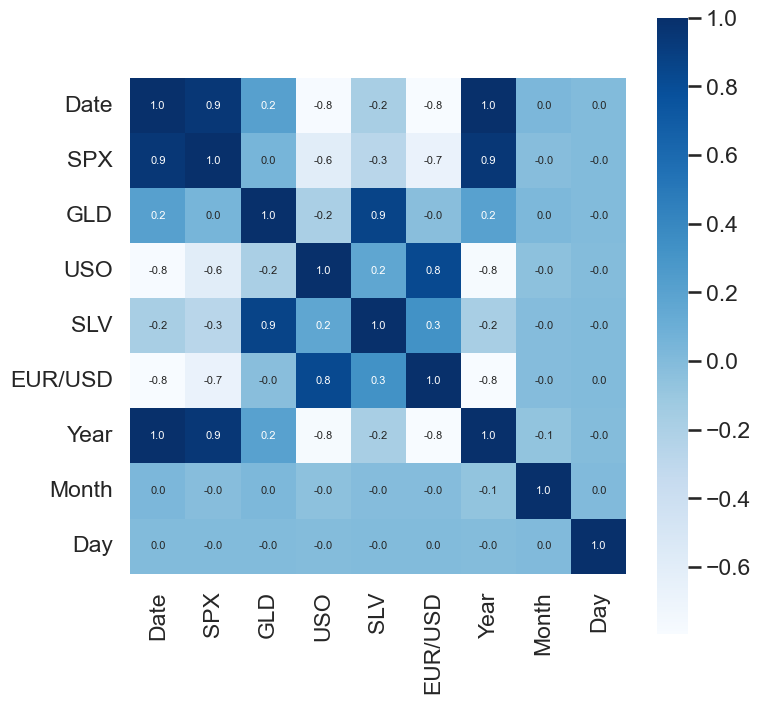

In [108]:
#HeatMap
plt.figure(figsize=(8,8))
sns.heatmap(correlation,cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size':8},cmap='Blues')


In [110]:
#correlation Of GLD
print(correlation['GLD'])


Date       0.209118
SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Year       0.206654
Month      0.020494
Day       -0.000198
Name: GLD, dtype: float64


C:\Users\ashis\AppData\Local\Temp\ipykernel_39044\247545855.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gold_data['GLD'], color='red')


<Axes: xlabel='GLD', ylabel='Density'>

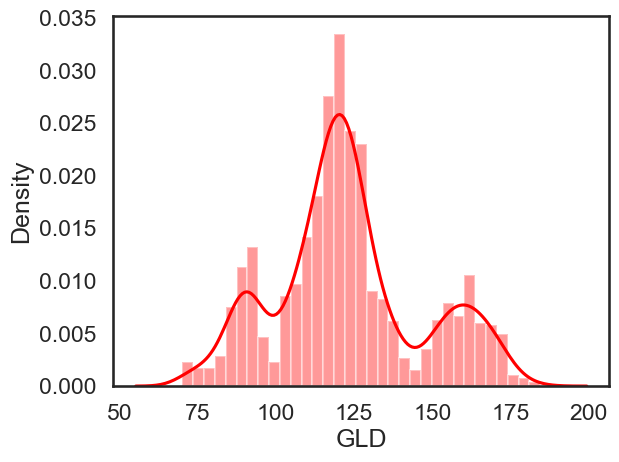

In [112]:
#distribution of gold price
sns.distplot(gold_data['GLD'], color='red')


In [114]:
#Spliting Features and Target

In [116]:
X=gold_data.drop(['Date','GLD'],axis=1)
Y=gold_data['GLD']


In [118]:
print(X)


              SPX        USO      SLV   EUR/USD  Year  Month  Day
0     1447.160034  78.470001  15.1800  1.471692  2008      1    2
1     1447.160034  78.370003  15.2850  1.474491  2008      1    3
2     1411.630005  77.309998  15.1670  1.475492  2008      1    4
3     1416.180054  75.500000  15.0530  1.468299  2008      1    7
4     1390.189941  76.059998  15.5900  1.557099  2008      1    8
...           ...        ...      ...       ...   ...    ...  ...
2285  2671.919922  14.060000  15.5100  1.186789  2018      5    8
2286  2697.790039  14.370000  15.5300  1.184722  2018      5    9
2287  2723.070068  14.410000  15.7400  1.191753  2018      5   10
2288  2730.129883  14.380000  15.5600  1.193118  2018      5   14
2289  2725.780029  14.405800  15.4542  1.182033  2018      5   16

[2290 rows x 7 columns]


In [120]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


In [122]:
#Spliting Into Training And Test data

In [124]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)


In [126]:
print(X.shape,X_train.shape,X_test.shape)

(2290, 7) (1832, 7) (458, 7)


In [130]:
#Model training


In [132]:
regressor=RandomForestRegressor(n_estimators=100) #default Number

In [134]:
 regressor.fit(X_train,Y_train)


RandomForestRegressor()

In [136]:
#Model Evaluation

In [138]:
#prediction on test Data
test_data_prediction=regressor.predict(X_test)


In [140]:
print(test_data_prediction)


[168.18989873  82.8820998  116.31160051 127.49660143 120.0993012
 154.59909826 150.63749916 126.22920018 117.50969847 126.20580084
 115.58510135 170.56860103 141.77789936 167.74299772 115.42100028
 117.82440077 134.59290189 171.39420283 159.88540303 172.42989931
 155.09010092 123.74360024 176.37610026 157.17720306 125.43710045
  93.62979911  77.52369993 119.14460015 118.99779894 167.43679901
  88.00300105 125.38439994  91.58100023 117.62810014 121.06709997
 135.57410116 115.8751008  114.05900038 142.16029936 107.33870066
 105.87110233  87.01179773 126.60800099 117.86810027 155.29389945
 120.19069949 108.59689979 108.04569796  92.88700008 127.11119739
  75.49769993 113.89070008 120.84769964 111.42179915 118.92359882
 121.11219888 159.85400155 175.7837998  146.27929673  86.82529978
  94.00140024  86.87739824  89.56880016 119.22120072 126.38600071
 127.89139953 172.01420091 122.39409928 117.54969884  97.60520033
 168.0857004  142.15689842 132.69660187 120.90000108 123.31319906
 119.732101

In [142]:
#R squarred Error
Error_score=metrics.r2_score(Y_test,test_data_prediction)
print("R squarred Error : ",Error_score)

R squarred Error :  0.9951342222298888


In [144]:
#Compare Actual values and Predicted values

In [146]:
Y_test=list(Y_test)

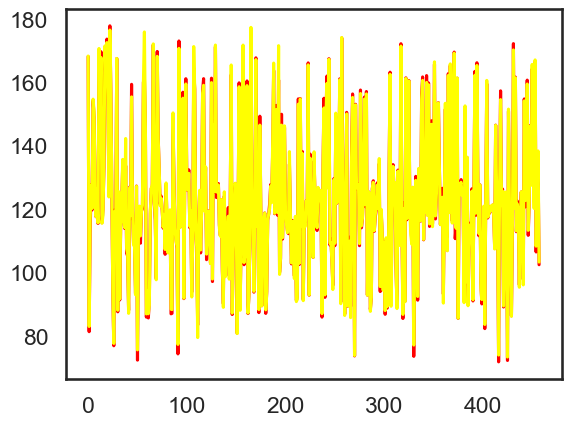

In [148]:
plt.plot(Y_test,color='red',label='Actual Value')
plt.plot(test_data_prediction,color='yellow',label='Predicted Value')
